In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [7]:
# CONFIG Matplotlib Parameters
themes = ['default', 'classic', 'bmh', 'dark_background', 'fast']
plt.style.use('classic')                        # theme (use "plt.style.available" method to find out available themes)
plt.rcParams["figure.figsize"] = (17,11.5)      # figure size
plt.rcParams["font.size"] = 11                  # font size
plt.rcParams["text.color"] = "black"            # text color

#### We will use the straightforward API from scipy to numerically approximate the solution to an ODE. For uses of the function refer to: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#r179348322575-6 

## Logistic ODE 

In [4]:
def logistic(t, x, r, K):
    return r*(1-x/K)*x

#Choose the initial population level, rate of growth and ceiling on the population level
y0 = 2
r = 0.5
K = 20

solRK = solve_ivp(logistic, [0,20], [y0], method='RK45', args=(r,K))
solBDF = solve_ivp(logistic, [0,20], [y0], method='BDF', args=(r,K))

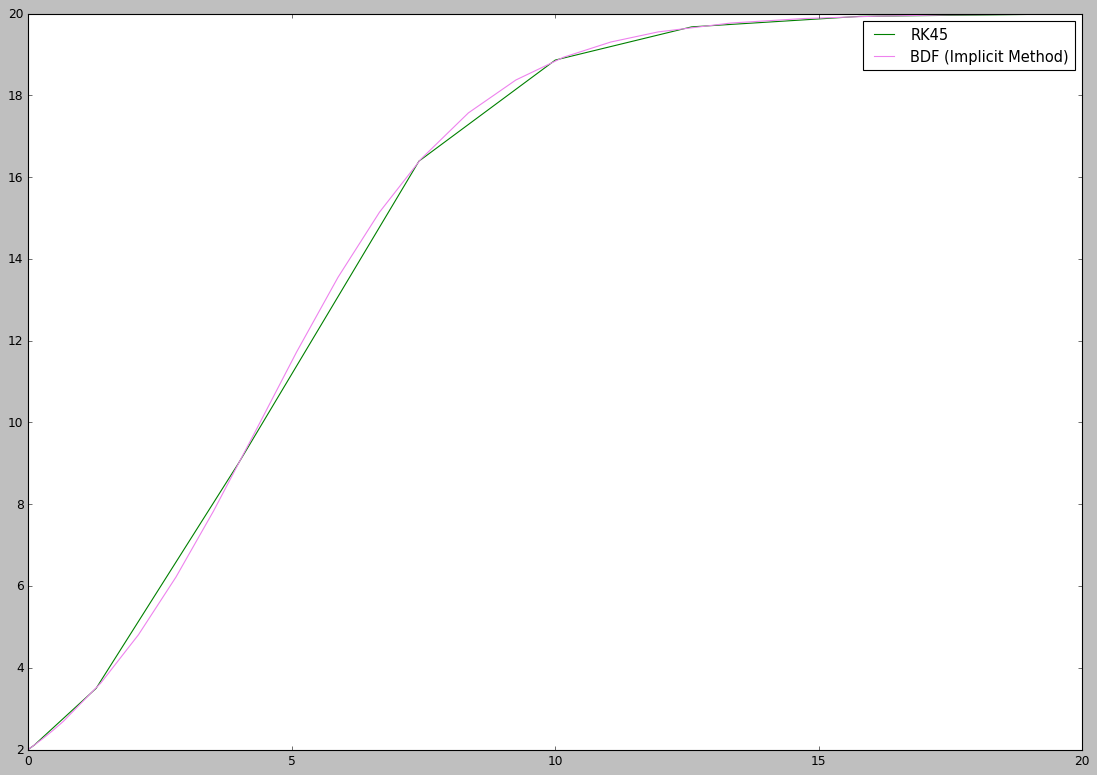

In [9]:
plt.plot(solRK.t, solRK.y[0], color='green', label='RK45')
plt.plot(solBDF.t, solBDF.y[0], color='violet', label='BDF (Implicit Method)')
plt.legend()
plt.show()

## Analysis
RK45 - is the Runga-Kutta ODE approximation method that works fine but is not smooth for any step size.

BDF - is an implicit method that is computationally more expensive but is more smooth than the RK45 method.

The graph tells us exactly what can be deduced from the ODE. Initially the population is 2 at time 0 and it grows steadily until it reaches the ceiling of 20. One can play around and see what would happen for a different initial value, rate of groth or ceiling.

For instance, suppose that the initial population was actually 100.

In [10]:
y0 = 100
r = 0.5
K = 20

solRK = solve_ivp(logistic, [0,20], [y0], method='RK45', args=(r,K))
solBDF = solve_ivp(logistic, [0,20], [y0], method='BDF', args=(r,K))

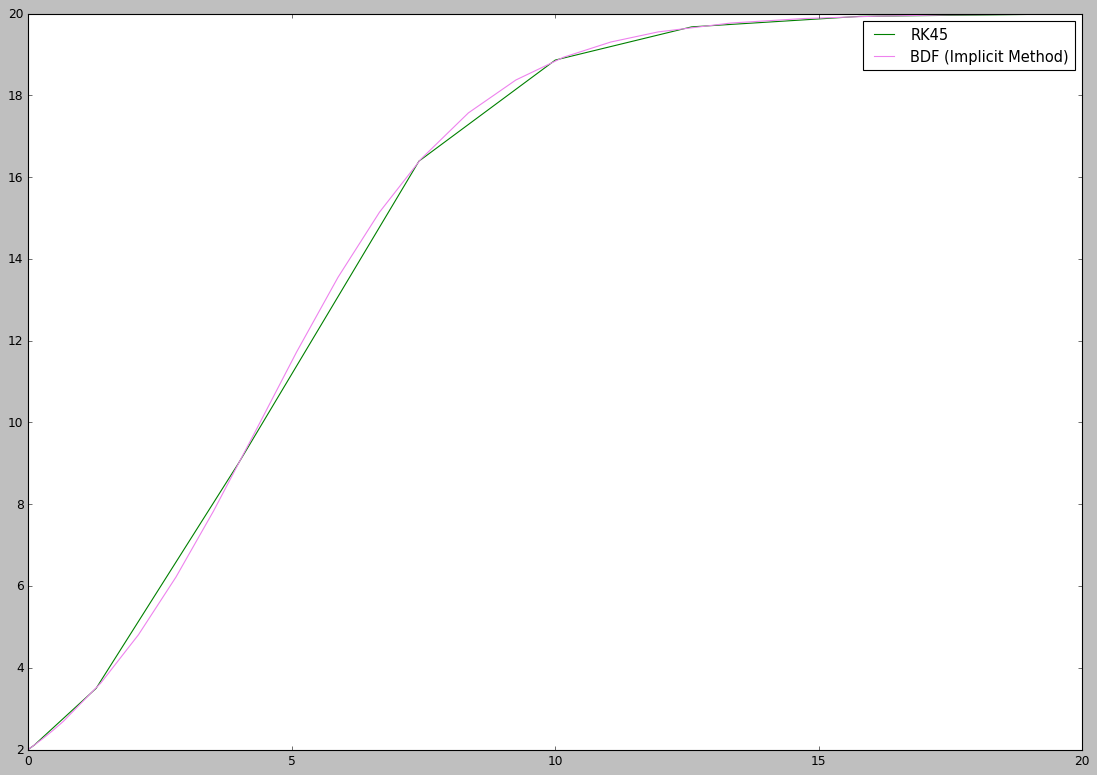

In [10]:
plt.plot(solRK.t, solRK.y[0], color='green', label='RK45')
plt.plot(solBDF.t, solBDF.y[0], color='violet', label='BDF (Implicit Method)')
plt.legend()
plt.show()

## Analysis 

Here the graph tells us that the initial population of a 100 is unstable and decreases until reaches a stable level of 20 as dictated by the parameter K.

## Exponential Decay 

In [23]:
def expDecay(t,x, r):
    """
    r - represents the decaying factor
    """
    return r*x

In [24]:
#Choose the rate of decay and the initial value
r = -2
y0 = 100

solRK = solve_ivp(expDecay, [0,10], [y0], method='RK45', args=(r,))
solBDF = solve_ivp(expDecay, [0,10], [y0], method='BDF', args=(r,))

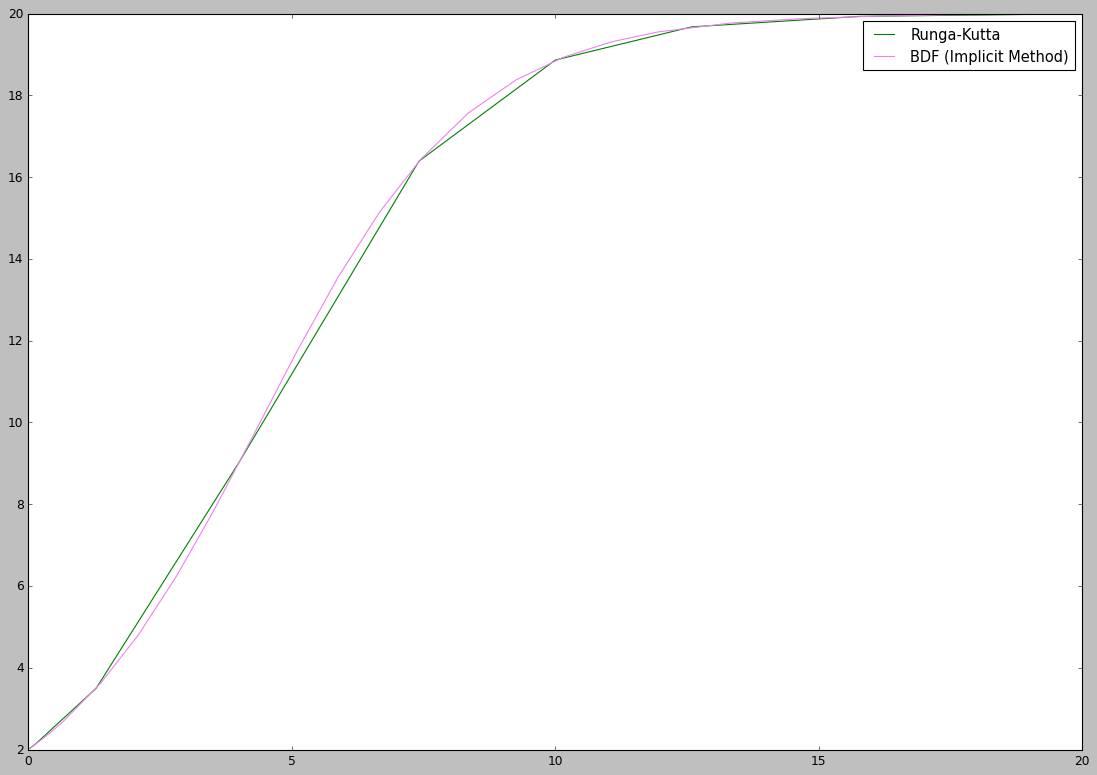

In [11]:
plt.plot(solRK.t, solRK.y[0], color='green', label='Runga-Kutta')
plt.plot(solBDF.t, solBDF.y[0], color='violet', label='BDF (Implicit Method)')
plt.legend()
plt.show()

## Analysis

This is a very classic ODE that often comes up in physics, geology and chemistry. It is often used to model the life-time of a certain isotope or element. The rate r, can be played around with to determine the speed at which decaying occurs. 

Also, note how the BDF method is much smoother than the RK45 method.

We can also model exponential growth by choosing a positive r value.

In [26]:
#Choose the rate of decay and the initial value
r = 2
y0 = 100

solRK = solve_ivp(expDecay, [0,10], [y0], method='RK45', args=(r,))
solBDF = solve_ivp(expDecay, [0,10], [y0], method='BDF', args=(r,))

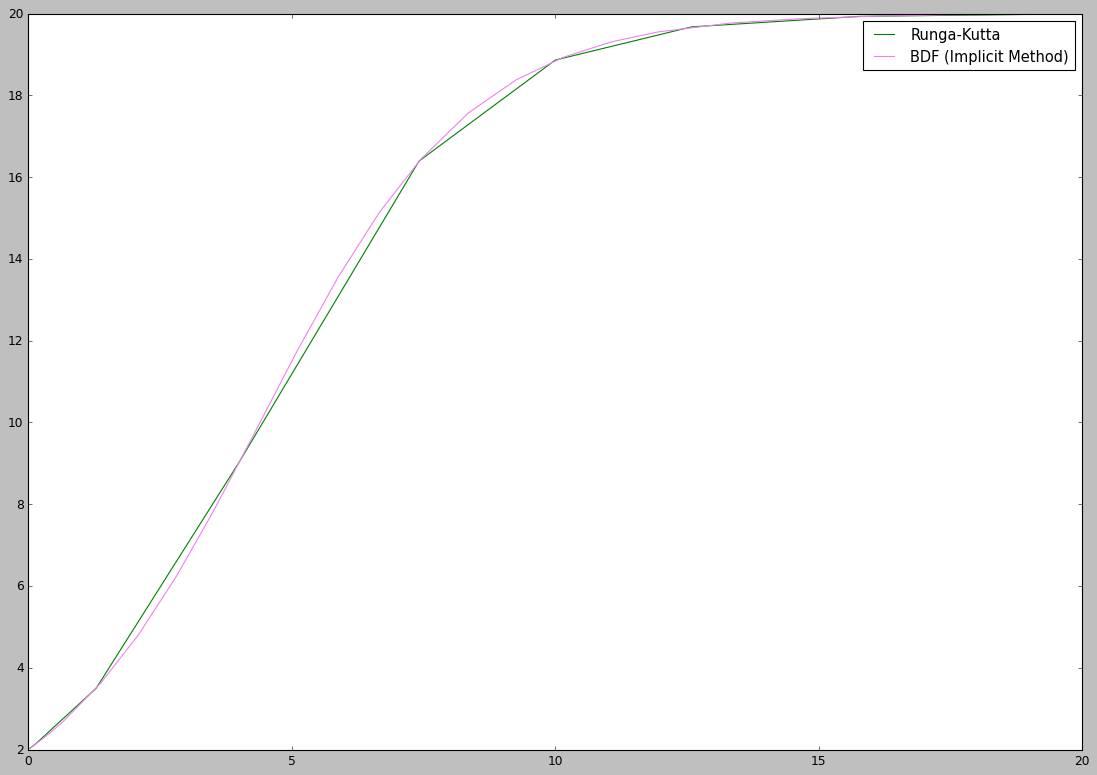

In [12]:
plt.plot(solRK.t, solRK.y[0], color='green', label='Runga-Kutta')
plt.plot(solBDF.t, solBDF.y[0], color='violet', label='BDF (Implicit Method)')
plt.legend()
plt.show()

## Harmonic Oscillator 

In [15]:
def harmonicOscillator(t, q, k, m):
    #define the dependent variables v=velocity, x=horizontal coord
    if (m==0):
        raise ValueError("mass can't be zero")
    v, x = q
    return [-(k/m)*x, v]

In [16]:
#Choose initial value and velocity
x0 = -1
v0 = 0

#Choose the spring constant and mass of the pendulum
k = 2
m = 1

solRK = solve_ivp(harmonicOscillator, [0,20], [x0,v0],method='RK45', args=(k,m), dense_output=True) 
solBDF = solve_ivp(harmonicOscillator, [0,20], [x0,v0],method='BDF', args=(k,m), dense_output=True)

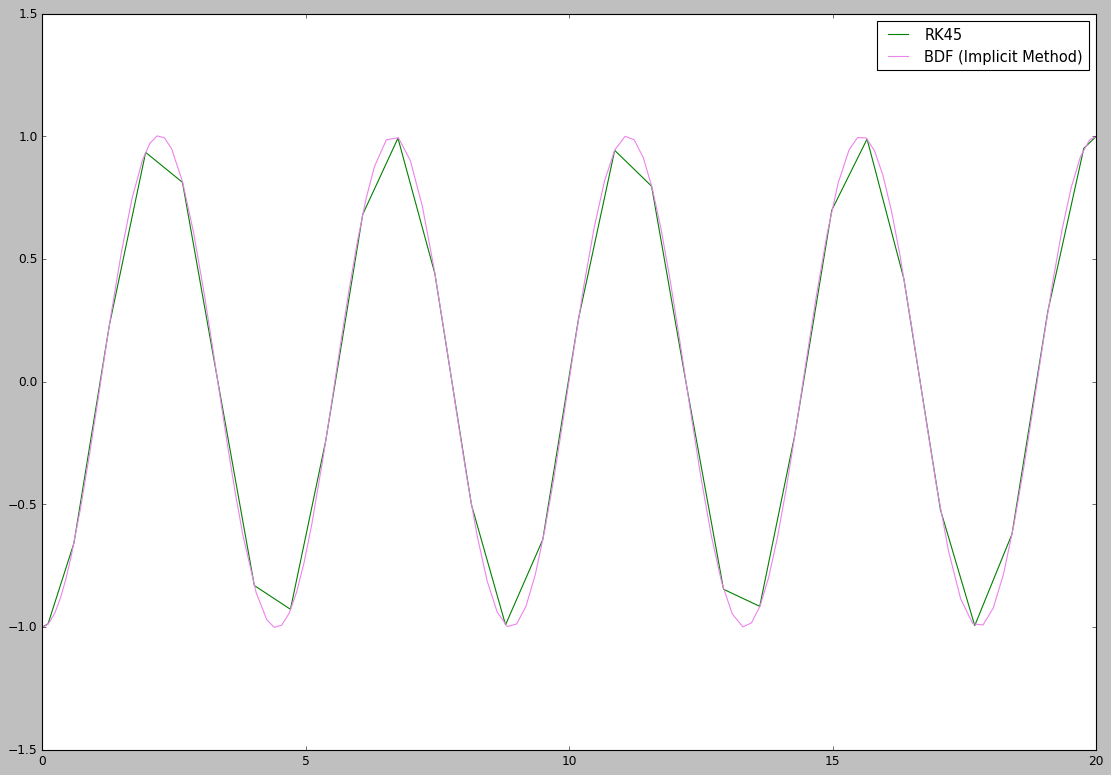

In [17]:
plt.plot(solRK.t, solRK.y[0], color='green', label='RK45')
plt.plot(solBDF.t, solBDF.y[0], color='violet', label='BDF (Implicit Method)')
plt.legend()
plt.show()

## Analysis

This is the classic harmonic oscillator or simple pendulum without forcing or damping. Simply put, the graph tells us that in the absence of damping force, the oscillator will continue to oscillate in a sinusoidal fashion. The parameter k denotes the stiffness of the string or hook. The higher k is, the less stiff it is and vice verca. 